In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('complaints.csv')

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/23/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,My credit report has incorrect information and...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,14616,None,Consent provided,Web,08/23/22,Closed with non-monetary relief,Yes,NaN,5909611
1,08/22/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,In reference to the Fair Credit Reporting Act ...,None,"EQUIFAX, INC.",DC,20020,None,Consent provided,Web,08/22/22,Closed with explanation,Yes,NaN,5904114
2,11/23/22,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,On XX/XX/2022 I received a phone call from XXX...,Company believes it acted appropriately as aut...,"MRS BPO, LLC",NY,10075,Older American,Consent provided,Web,11/23/22,Closed with non-monetary relief,Yes,NaN,6232187
3,07/11/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,I reached out to XXXX to dispute information o...,None,"National Credit Systems,Inc.",AZ,85006,None,Consent provided,Web,07/11/22,Closed with explanation,Yes,NaN,5756379
4,08/14/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I found inaccurate and incorrect data on my cr...,None,"EQUIFAX, INC.",NC,28216,None,Consent provided,Web,08/14/22,Closed with explanation,Yes,NaN,5877801


In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
df=df[df['Consumer complaint narrative'].notna()]

In [6]:
df.shape

(641595, 18)

In [7]:
df=df.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'})

In [8]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

<AxesSubplot:xlabel='Product'>

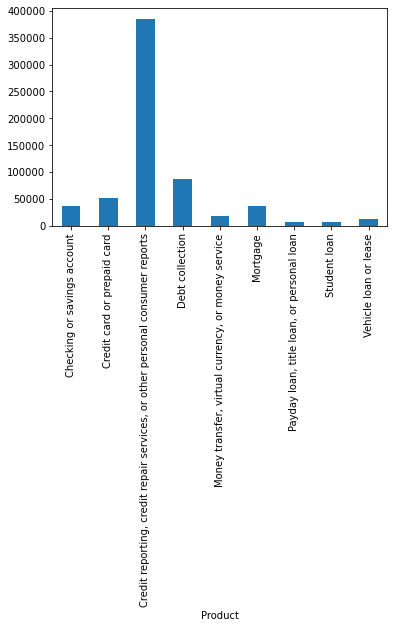

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure()
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)

In [10]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    385193
Debt collection                                                                  86519
Credit card or prepaid card                                                      50810
Mortgage                                                                         36808
Checking or savings account                                                      36137
Money transfer, virtual currency, or money service                               19022
Vehicle loan or lease                                                            11918
Student loan                                                                      7901
Payday loan, title loan, or personal loan                                         7287
Name: Product, dtype: int64

In [11]:
credit_report=df[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports']
prepaid_card=df[df['Product']=='Credit card or prepaid card']
debt_collection=df[df['Product']=='Debt collection']
vehicle_loan=df[df['Product']=='Vehicle loan or lease']
mortgage=df[df['Product']=='Mortgage']
payday_loan=df[df['Product']=='Payday loan, title loan, or personal loan']
money_transfer=df[df['Product']=='Money transfer, virtual currency, or money service']
student_loan=df[df['Product']=='Student loan']
savings_account=df[df['Product']=='Checking or savings account']

In [12]:
from textaugment import EDA
t = EDA()
for i in range(0,6):
    ans = t.synonym_replacement("someone in north Carolina has stolen my identity information and has purchased items including XXXX cell phones thru XXXX on XXXX/XXXX/2015. A police report was filed as soon as I found out about it on XXXX/XXXX/2015. A investigation from XXXX is under way thru there fraud department and our local police department.",6)

    print("This is ans:",ans)
    print("--------------------")

This is ans: someone in north Carolina has stolen my identity data and has buy point admit XXXX cell phones thru XXXX on XXXX/XXXX/2015. A police report was filed as soon as I found out about it on XXXX/XXXX/2015. A probe from XXXX is under way thru there fraud department and our topical anaesthetic police department.
--------------------
This is ans: someone in frederick north Carolina has slip my identity data and has purchased items including XXXX cell phones thru XXXX on XXXX/XXXX/2015. A police report was filed as soon as I found out about it on XXXX/XXXX/2015. A investigation from XXXX is under agency thru there impostor section and our local police department.
--------------------
This is ans: someone in union Carolina has stolen my identity information and has purchased detail including XXXX cell telephone thru XXXX on XXXX/XXXX/2015. A police report was filed as soon as I incur out about it on XXXX/XXXX/2015. A investigation from XXXX is under way thru there fraud section and 

In [14]:
credit_report=credit_report.sample(1000)
prepaid_card=prepaid_card.sample(1000)
debt_collection=debt_collection.sample(1000)
vehicle_loan=vehicle_loan.sample(1000)
mortgage=mortgage.sample(1000)
payday_loan=payday_loan.sample(1000)
money_transfer=money_transfer.sample(1000)
student_loan=student_loan.sample(1000)
savings_account=savings_account.sample(1000)

In [15]:
print(credit_report)

       Date received                                            Product  \
589785      04/22/22  Credit reporting, credit repair services, or o...   
636257      04/06/22  Credit reporting, credit repair services, or o...   
542966      10/29/21  Credit reporting, credit repair services, or o...   
55706       04/13/22  Credit reporting, credit repair services, or o...   
190464      08/18/22  Credit reporting, credit repair services, or o...   
...              ...                                                ...   
367628      03/05/21  Credit reporting, credit repair services, or o...   
33217       07/12/22  Credit reporting, credit repair services, or o...   
198449      02/24/20  Credit reporting, credit repair services, or o...   
262872      02/04/22  Credit reporting, credit repair services, or o...   
242493      02/22/22  Credit reporting, credit repair services, or o...   

             Sub-product                                              Issue  \
589785  Credit repor

In [16]:
credit_report = credit_report[['Consumer_complaint_narrative','Product']]
prepaid_card = prepaid_card[['Consumer_complaint_narrative','Product']]
debt_collection = debt_collection[['Consumer_complaint_narrative','Product']]
vehicle_loan = vehicle_loan[['Consumer_complaint_narrative','Product']]
mortgage = mortgage[['Consumer_complaint_narrative','Product']]
payday_loan = payday_loan[['Consumer_complaint_narrative','Product']]
money_transfer = money_transfer[['Consumer_complaint_narrative','Product']]
student_loan = student_loan[['Consumer_complaint_narrative','Product']]
savings_account = savings_account[['Consumer_complaint_narrative','Product']]

df=credit_report.append(prepaid_card,ignore_index=True)
df=df.append(debt_collection,ignore_index=True)
df=df.append(vehicle_loan,ignore_index=True)
df=df.append(mortgage,ignore_index=True)
df=df.append(payday_loan,ignore_index=True)
df=df.append(money_transfer,ignore_index=True)
df=df.append(student_loan,ignore_index=True)
df=df.append(savings_account,ignore_index=True)
print(df.shape)

(9000, 2)


In [17]:
print(vehicle_loan.shape)

d={"Consumer_complaint_narrative":[],"Product":[]}


from textaugment import EDA
t = EDA()

ud = pd.DataFrame(d)
for index,row in vehicle_loan.head(7000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

vehicle_loan = ud
#print(vehicle_loan.shape)

ud = pd.DataFrame(d)
for index,row in payday_loan.head(5500).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,2):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

payday_loan = ud

ud = pd.DataFrame(d)
for index,row in money_transfer.head(6000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

money_transfer = ud

ud = pd.DataFrame(d)
for index,row in student_loan.head(3000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

student_loan = ud

(1000, 2)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(5, 2)
(6, 2)
(7, 2)
(8, 2)
(9, 2)
(10, 2)
(11, 2)
(12, 2)
(13, 2)
(14, 2)
(15, 2)
(16, 2)
(17, 2)
(18, 2)
(19, 2)
(20, 2)
(21, 2)
(22, 2)
(23, 2)
(24, 2)
(25, 2)
(26, 2)
(27, 2)
(28, 2)
(29, 2)
(30, 2)
(31, 2)
(32, 2)
(33, 2)
(34, 2)
(35, 2)
(36, 2)
(37, 2)
(38, 2)
(39, 2)
(40, 2)
(41, 2)
(42, 2)
(43, 2)
(44, 2)
(45, 2)
(46, 2)
(47, 2)
(48, 2)
(49, 2)
(50, 2)
(51, 2)
(52, 2)
(53, 2)
(54, 2)
(55, 2)
(56, 2)
(57, 2)
(58, 2)
(59, 2)
(60, 2)
(61, 2)
(62, 2)
(63, 2)
(64, 2)
(65, 2)
(66, 2)
(67, 2)
(68, 2)
(69, 2)
(70, 2)
(71, 2)
(72, 2)
(73, 2)
(74, 2)
(75, 2)
(76, 2)
(77, 2)
(78, 2)
(79, 2)
(80, 2)
(81, 2)
(82, 2)
(83, 2)
(84, 2)
(85, 2)
(86, 2)
(87, 2)
(88, 2)
(89, 2)
(90, 2)
(91, 2)
(92, 2)
(93, 2)
(94, 2)
(95, 2)
(96, 2)
(97, 2)
(98, 2)
(99, 2)
(100, 2)
(101, 2)
(102, 2)
(103, 2)
(104, 2)
(105, 2)
(106, 2)
(107, 2)
(108, 2)
(109, 2)
(110, 2)
(111, 2)
(112, 2)
(113, 2)
(114, 2)
(115, 2)
(116, 2)
(117, 2)
(118, 2)
(119, 2)
(120, 2)
(121, 2)
(122, 2)


(952, 2)
(953, 2)
(954, 2)
(955, 2)
(956, 2)
(957, 2)
(958, 2)
(959, 2)
(960, 2)
(961, 2)
(962, 2)
(963, 2)
(964, 2)
(965, 2)
(966, 2)
(967, 2)
(968, 2)
(969, 2)
(970, 2)
(971, 2)
(972, 2)
(973, 2)
(974, 2)
(975, 2)
(976, 2)
(977, 2)
(978, 2)
(979, 2)
(980, 2)
(981, 2)
(982, 2)
(983, 2)
(984, 2)
(985, 2)
(986, 2)
(987, 2)
(988, 2)
(989, 2)
(990, 2)
(991, 2)
(992, 2)
(993, 2)
(994, 2)
(995, 2)
(996, 2)
(997, 2)
(998, 2)
(999, 2)
(1000, 2)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(5, 2)
(6, 2)
(7, 2)
(8, 2)
(9, 2)
(10, 2)
(11, 2)
(12, 2)
(13, 2)
(14, 2)
(15, 2)
(16, 2)
(17, 2)
(18, 2)
(19, 2)
(20, 2)
(21, 2)
(22, 2)
(23, 2)
(24, 2)
(25, 2)
(26, 2)
(27, 2)
(28, 2)
(29, 2)
(30, 2)
(31, 2)
(32, 2)
(33, 2)
(34, 2)
(35, 2)
(36, 2)
(37, 2)
(38, 2)
(39, 2)
(40, 2)
(41, 2)
(42, 2)
(43, 2)
(44, 2)
(45, 2)
(46, 2)
(47, 2)
(48, 2)
(49, 2)
(50, 2)
(51, 2)
(52, 2)
(53, 2)
(54, 2)
(55, 2)
(56, 2)
(57, 2)
(58, 2)
(59, 2)
(60, 2)
(61, 2)
(62, 2)
(63, 2)
(64, 2)
(65, 2)
(66, 2)
(67, 2)
(68, 2)
(69, 2)
(70, 2)
(71, 2)

(898, 2)
(899, 2)
(900, 2)
(901, 2)
(902, 2)
(903, 2)
(904, 2)
(905, 2)
(906, 2)
(907, 2)
(908, 2)
(909, 2)
(910, 2)
(911, 2)
(912, 2)
(913, 2)
(914, 2)
(915, 2)
(916, 2)
(917, 2)
(918, 2)
(919, 2)
(920, 2)
(921, 2)
(922, 2)
(923, 2)
(924, 2)
(925, 2)
(926, 2)
(927, 2)
(928, 2)
(929, 2)
(930, 2)
(931, 2)
(932, 2)
(933, 2)
(934, 2)
(935, 2)
(936, 2)
(937, 2)
(938, 2)
(939, 2)
(940, 2)
(941, 2)
(942, 2)
(943, 2)
(944, 2)
(945, 2)
(946, 2)
(947, 2)
(948, 2)
(949, 2)
(950, 2)
(951, 2)
(952, 2)
(953, 2)
(954, 2)
(955, 2)
(956, 2)
(957, 2)
(958, 2)
(959, 2)
(960, 2)
(961, 2)
(962, 2)
(963, 2)
(964, 2)
(965, 2)
(966, 2)
(967, 2)
(968, 2)
(969, 2)
(970, 2)
(971, 2)
(972, 2)
(973, 2)
(974, 2)
(975, 2)
(976, 2)
(977, 2)
(978, 2)
(979, 2)
(980, 2)
(981, 2)
(982, 2)
(983, 2)
(984, 2)
(985, 2)
(986, 2)
(987, 2)
(988, 2)
(989, 2)
(990, 2)
(991, 2)
(992, 2)
(993, 2)
(994, 2)
(995, 2)
(996, 2)
(997, 2)
(998, 2)
(999, 2)
(1000, 2)
(1001, 2)
(1002, 2)
(1003, 2)
(1004, 2)
(1005, 2)
(1006, 2)
(1007, 2)
(1

(1767, 2)
(1768, 2)
(1769, 2)
(1770, 2)
(1771, 2)
(1772, 2)
(1773, 2)
(1774, 2)
(1775, 2)
(1776, 2)
(1777, 2)
(1778, 2)
(1779, 2)
(1780, 2)
(1781, 2)
(1782, 2)
(1783, 2)
(1784, 2)
(1785, 2)
(1786, 2)
(1787, 2)
(1788, 2)
(1789, 2)
(1790, 2)
(1791, 2)
(1792, 2)
(1793, 2)
(1794, 2)
(1795, 2)
(1796, 2)
(1797, 2)
(1798, 2)
(1799, 2)
(1800, 2)
(1801, 2)
(1802, 2)
(1803, 2)
(1804, 2)
(1805, 2)
(1806, 2)
(1807, 2)
(1808, 2)
(1809, 2)
(1810, 2)
(1811, 2)
(1812, 2)
(1813, 2)
(1814, 2)
(1815, 2)
(1816, 2)
(1817, 2)
(1818, 2)
(1819, 2)
(1820, 2)
(1821, 2)
(1822, 2)
(1823, 2)
(1824, 2)
(1825, 2)
(1826, 2)
(1827, 2)
(1828, 2)
(1829, 2)
(1830, 2)
(1831, 2)
(1832, 2)
(1833, 2)
(1834, 2)
(1835, 2)
(1836, 2)
(1837, 2)
(1838, 2)
(1839, 2)
(1840, 2)
(1841, 2)
(1842, 2)
(1843, 2)
(1844, 2)
(1845, 2)
(1846, 2)
(1847, 2)
(1848, 2)
(1849, 2)
(1850, 2)
(1851, 2)
(1852, 2)
(1853, 2)
(1854, 2)
(1855, 2)
(1856, 2)
(1857, 2)
(1858, 2)
(1859, 2)
(1860, 2)
(1861, 2)
(1862, 2)
(1863, 2)
(1864, 2)
(1865, 2)
(1866, 2)


(710, 2)
(711, 2)
(712, 2)
(713, 2)
(714, 2)
(715, 2)
(716, 2)
(717, 2)
(718, 2)
(719, 2)
(720, 2)
(721, 2)
(722, 2)
(723, 2)
(724, 2)
(725, 2)
(726, 2)
(727, 2)
(728, 2)
(729, 2)
(730, 2)
(731, 2)
(732, 2)
(733, 2)
(734, 2)
(735, 2)
(736, 2)
(737, 2)
(738, 2)
(739, 2)
(740, 2)
(741, 2)
(742, 2)
(743, 2)
(744, 2)
(745, 2)
(746, 2)
(747, 2)
(748, 2)
(749, 2)
(750, 2)
(751, 2)
(752, 2)
(753, 2)
(754, 2)
(755, 2)
(756, 2)
(757, 2)
(758, 2)
(759, 2)
(760, 2)
(761, 2)
(762, 2)
(763, 2)
(764, 2)
(765, 2)
(766, 2)
(767, 2)
(768, 2)
(769, 2)
(770, 2)
(771, 2)
(772, 2)
(773, 2)
(774, 2)
(775, 2)
(776, 2)
(777, 2)
(778, 2)
(779, 2)
(780, 2)
(781, 2)
(782, 2)
(783, 2)
(784, 2)
(785, 2)
(786, 2)
(787, 2)
(788, 2)
(789, 2)
(790, 2)
(791, 2)
(792, 2)
(793, 2)
(794, 2)
(795, 2)
(796, 2)
(797, 2)
(798, 2)
(799, 2)
(800, 2)
(801, 2)
(802, 2)
(803, 2)
(804, 2)
(805, 2)
(806, 2)
(807, 2)
(808, 2)
(809, 2)
(810, 2)
(811, 2)
(812, 2)
(813, 2)
(814, 2)
(815, 2)
(816, 2)
(817, 2)
(818, 2)
(819, 2)
(820, 2)
(

(664, 2)
(665, 2)
(666, 2)
(667, 2)
(668, 2)
(669, 2)
(670, 2)
(671, 2)
(672, 2)
(673, 2)
(674, 2)
(675, 2)
(676, 2)
(677, 2)
(678, 2)
(679, 2)
(680, 2)
(681, 2)
(682, 2)
(683, 2)
(684, 2)
(685, 2)
(686, 2)
(687, 2)
(688, 2)
(689, 2)
(690, 2)
(691, 2)
(692, 2)
(693, 2)
(694, 2)
(695, 2)
(696, 2)
(697, 2)
(698, 2)
(699, 2)
(700, 2)
(701, 2)
(702, 2)
(703, 2)
(704, 2)
(705, 2)
(706, 2)
(707, 2)
(708, 2)
(709, 2)
(710, 2)
(711, 2)
(712, 2)
(713, 2)
(714, 2)
(715, 2)
(716, 2)
(717, 2)
(718, 2)
(719, 2)
(720, 2)
(721, 2)
(722, 2)
(723, 2)
(724, 2)
(725, 2)
(726, 2)
(727, 2)
(728, 2)
(729, 2)
(730, 2)
(731, 2)
(732, 2)
(733, 2)
(734, 2)
(735, 2)
(736, 2)
(737, 2)
(738, 2)
(739, 2)
(740, 2)
(741, 2)
(742, 2)
(743, 2)
(744, 2)
(745, 2)
(746, 2)
(747, 2)
(748, 2)
(749, 2)
(750, 2)
(751, 2)
(752, 2)
(753, 2)
(754, 2)
(755, 2)
(756, 2)
(757, 2)
(758, 2)
(759, 2)
(760, 2)
(761, 2)
(762, 2)
(763, 2)
(764, 2)
(765, 2)
(766, 2)
(767, 2)
(768, 2)
(769, 2)
(770, 2)
(771, 2)
(772, 2)
(773, 2)
(774, 2)
(

In [18]:
df=df.append(vehicle_loan,ignore_index=True)
df=df.append(payday_loan,ignore_index=True)
df=df.append(money_transfer,ignore_index=True)
df=df.append(student_loan,ignore_index=True)

In [19]:
df.shape

(14000, 2)

In [20]:
df['Product'].value_counts()

Payday loan, title loan, or personal loan                                       3000
Money transfer, virtual currency, or money service                              2000
Student loan                                                                    2000
Vehicle loan or lease                                                           2000
Checking or savings account                                                     1000
Mortgage                                                                        1000
Debt collection                                                                 1000
Credit card or prepaid card                                                     1000
Credit reporting, credit repair services, or other personal consumer reports    1000
Name: Product, dtype: int64

In [21]:
#LowerCase Conversion
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [22]:
df['Consumer_complaint_narrative'].sample(5)

796     i made 3 phone calls today alone to experian t...
1574    i have contacted wells fargo xxxx different ti...
5587    i am xxxx xxxx and i am submitting this compla...
8512    received call from xxxx xxxx xxxx government i...
9194    my complaint relates to the final payment prac...
Name: Consumer_complaint_narrative, dtype: object

In [23]:
#Punctuations Removal
#Digits Removal
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace(r'[\d]',"")

<ipython-input-23-86a75768ada9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")
<ipython-input-23-86a75768ada9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace(r'[\d]',"")


In [24]:
#StopWords Removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [25]:
from nltk.stem import WordNetLemmatizer

In [26]:
lemmatizer=WordNetLemmatizer()

In [27]:
#Lemmatization
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

In [28]:
#Removing xxxx present in complaints
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace('x',"")

In [29]:
for index,row in df.iterrows():
    row['Consumer_complaint_narrative']=row['Consumer_complaint_narrative'].strip()

In [30]:
df['Consumer_complaint_narrative'].sample(5)

5079    judgement filed regarding title loan consisten...
6372    paypal closed account reason help getting back...
976     account accurately showing report closed satis...
2565    discovered account credit report belong happen...
1541    complaint company citibank back   applied cred...
Name: Consumer_complaint_narrative, dtype: object

Credit reporting, credit repair services, or other personal consumer reports


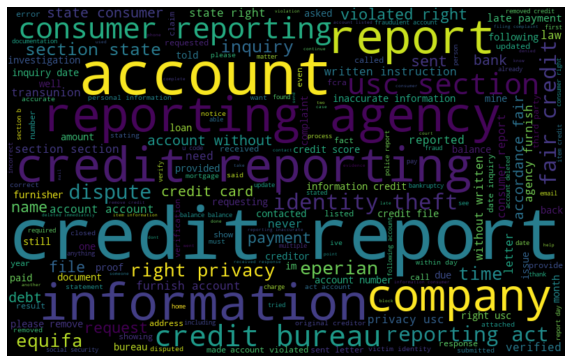

Credit card or prepaid card


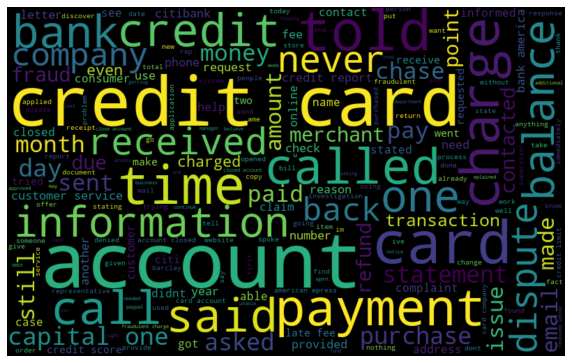

Debt collection


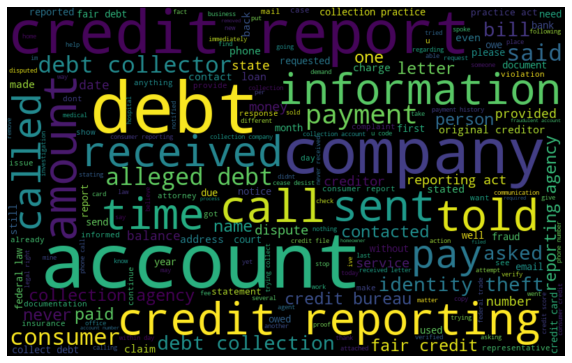

Vehicle loan or lease


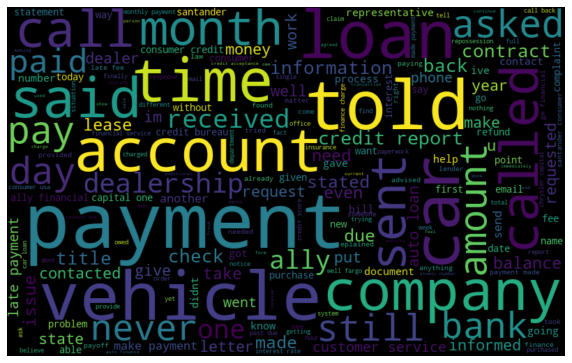

Mortgage


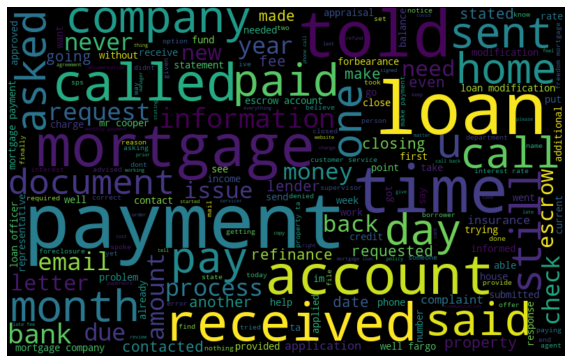

Payday loan, title loan, or personal loan


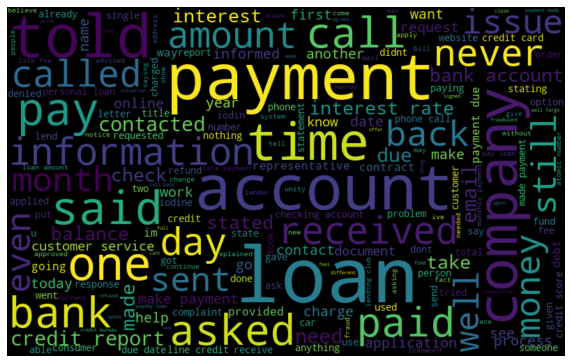

Money transfer, virtual currency, or money service


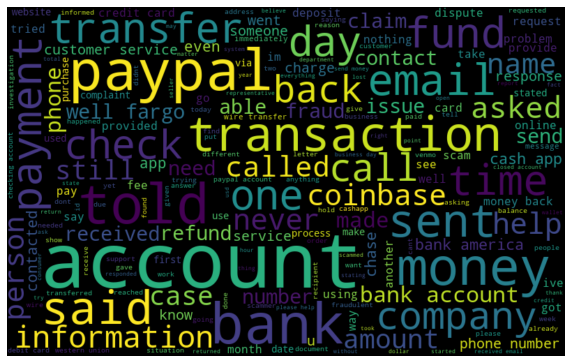

Student loan


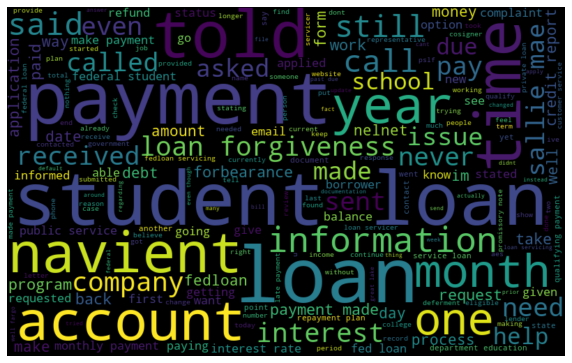

Checking or savings account


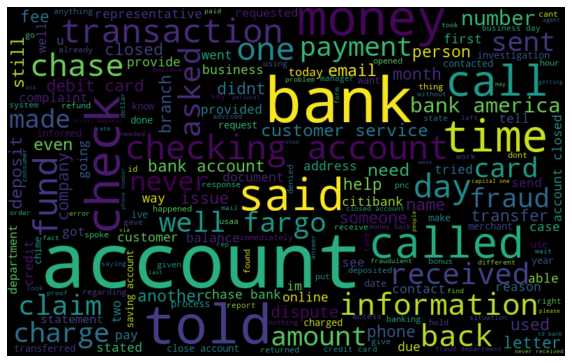

In [31]:
from wordcloud import WordCloud
for product_name in df['Product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df.loc[df['Product'].str.contains(product_name),'Consumer_complaint_narrative']])
    
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [33]:
X_train,X_test,y_train,y_test=train_test_split(df['Consumer_complaint_narrative'],df['Product'],test_size=0.3,random_state=68)

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
text=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(2,2))),('classifier',MultinomialNB())])

In [36]:
text.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(2, 2))),
                ('classifier', MultinomialNB())])

In [37]:
predictions=text.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
print(confusion_matrix(y_test,predictions))

[[  1   0   0   0 121   0 181   0   1]
 [  0   9   1   2  29   0 267   2   2]
 [  0   0 121   7   0   0 187   1  14]
 [  0   1  14  48   1   1 251   1  16]
 [  0   1   0   0 486   0  87   2   0]
 [  0   2   1   0   1  21 252   3   1]
 [  0   0   1   1   1   0 910   0   9]
 [  0   3   3   0   0   0  80 481   6]
 [  0   3   4   0   0   0 135   0 427]]


In [40]:
print(classification_report(y_test,predictions))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       1.00      0.00      0.01       304
                                                 Credit card or prepaid card       0.47      0.03      0.05       312
Credit reporting, credit repair services, or other personal consumer reports       0.83      0.37      0.51       330
                                                             Debt collection       0.83      0.14      0.25       333
                          Money transfer, virtual currency, or money service       0.76      0.84      0.80       576
                                                                    Mortgage       0.95      0.07      0.14       281
                                   Payday loan, title loan, or personal loan       0.39      0.99      0.56       922
                                                       

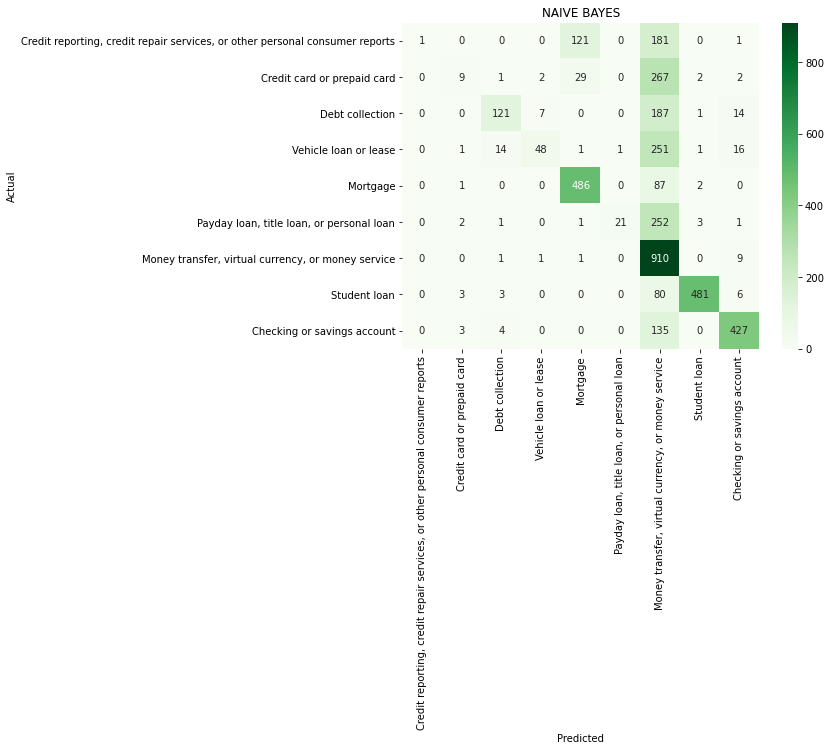

In [41]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('NAIVE BAYES')
plt.show()

In [42]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [43]:
metrics.accuracy_score(y_test,predictions)

0.5961904761904762

In [44]:
metrics.precision_score(y_test,predictions,average=None)

array([1.        , 0.47368421, 0.83448276, 0.82758621, 0.76056338,
       0.95454545, 0.38723404, 0.98163265, 0.89705882])

In [45]:
metrics.recall_score(y_test,predictions,average=None)

array([0.00328947, 0.02884615, 0.36666667, 0.14414414, 0.84375   ,
       0.0747331 , 0.98698482, 0.83944154, 0.75043937])

In [46]:
metrics.f1_score(y_test,predictions,average=None)

array([0.00655738, 0.05438066, 0.50947368, 0.2455243 , 0.8       ,
       0.13861386, 0.55623472, 0.90498589, 0.81722488])

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
text_dectree=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(2,2))),('classifier',DecisionTreeClassifier())])

In [49]:
text_dectree.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(2, 2))),
                ('classifier', DecisionTreeClassifier())])

In [50]:
predictions_dectree=text_dectree.predict(X_test)

In [51]:
print(confusion_matrix(y_test,predictions_dectree))

[[128  26  22   8  74   4  24   8  10]
 [ 35 160  25  11  31   5  26   5  14]
 [  4  17 190  47   5   7  24   8  28]
 [ 11  23  94 121  17   4  27  11  25]
 [ 55  26  48   7 383   5  28  10  14]
 [ 12  14  29   5  20 149  24  16  12]
 [ 24  15  89  18  23  18 674  17  44]
 [  6  10  32  15  10  10  35 441  14]
 [ 13  15  58  14  19   7  35  13 395]]


In [52]:
print(classification_report(y_test,predictions_dectree))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.44      0.42      0.43       304
                                                 Credit card or prepaid card       0.52      0.51      0.52       312
Credit reporting, credit repair services, or other personal consumer reports       0.32      0.58      0.41       330
                                                             Debt collection       0.49      0.36      0.42       333
                          Money transfer, virtual currency, or money service       0.66      0.66      0.66       576
                                                                    Mortgage       0.71      0.53      0.61       281
                                   Payday loan, title loan, or personal loan       0.75      0.73      0.74       922
                                                       

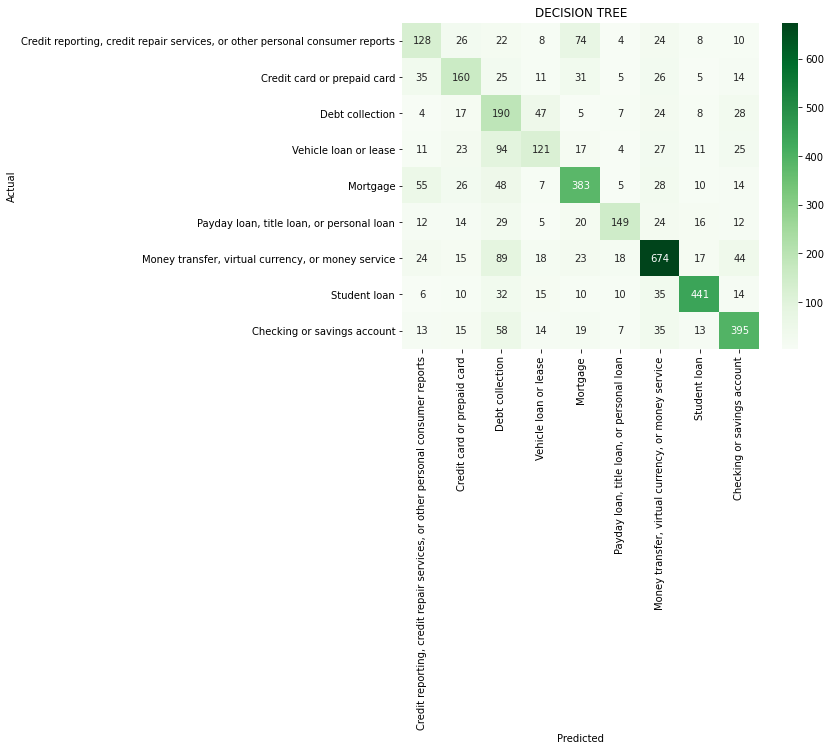

In [53]:
confu_mat = confusion_matrix(y_test, predictions_dectree)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('DECISION TREE')
plt.show()

In [54]:
metrics.accuracy_score(y_test,predictions_dectree)

0.6288095238095238

In [55]:
from sklearn.svm import LinearSVC

In [56]:
text_svm=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(2,2))),('classifier',LinearSVC())])

In [57]:
text_svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(2, 2))),
                ('classifier', LinearSVC())])

In [58]:
predictions_svm=text_svm.predict(X_test)

In [59]:
print(confusion_matrix(y_test,predictions_svm))

[[181  24   1   0  77   2  13   0   6]
 [ 26 212   7   6  21   0  27   5   8]
 [  2  13 231  33   4   8  14   6  19]
 [  6  13  51 204  10   5  30   4  10]
 [ 22  11   0   0 514   2  22   3   2]
 [  5   4   2   0   2 244  14   6   4]
 [  2   2   1   2   6   0 896   0  13]
 [  0   4   5   6   3   0  13 536   6]
 [  7   3  12  10   2   4  22   2 507]]


In [60]:
print(classification_report(y_test,predictions_svm))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.72      0.60      0.65       304
                                                 Credit card or prepaid card       0.74      0.68      0.71       312
Credit reporting, credit repair services, or other personal consumer reports       0.75      0.70      0.72       330
                                                             Debt collection       0.78      0.61      0.69       333
                          Money transfer, virtual currency, or money service       0.80      0.89      0.85       576
                                                                    Mortgage       0.92      0.87      0.89       281
                                   Payday loan, title loan, or personal loan       0.85      0.97      0.91       922
                                                       

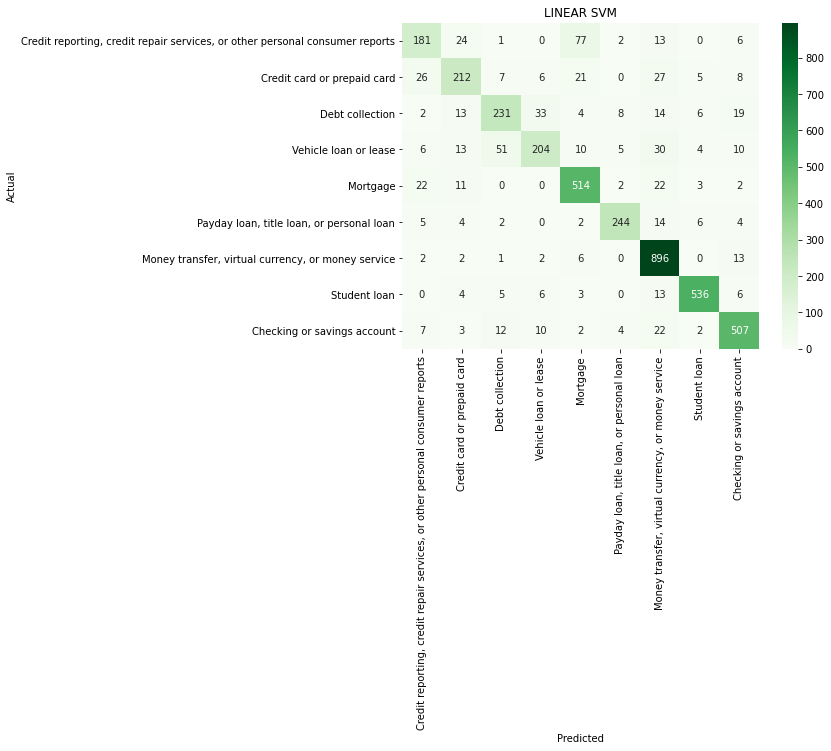

In [61]:
confu_mat = confusion_matrix(y_test, predictions_svm)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LINEAR SVM')
plt.show()

In [62]:
metrics.accuracy_score(y_test,predictions_svm)

0.8392857142857143

In [63]:
metrics.precision_score(y_test,predictions_svm,average=None)

array([0.72111554, 0.74125874, 0.74516129, 0.7816092 , 0.80438185,
       0.92075472, 0.85252141, 0.95373665, 0.88173913])

In [64]:
metrics.recall_score(y_test,predictions_svm,average=None)

array([0.59539474, 0.67948718, 0.7       , 0.61261261, 0.89236111,
       0.8683274 , 0.97180043, 0.93542757, 0.89103691])

In [65]:
metrics.f1_score(y_test,predictions_svm,average=None)

array([0.65225225, 0.7090301 , 0.721875  , 0.68686869, 0.84609053,
       0.89377289, 0.90826153, 0.94449339, 0.88636364])

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
text_logi=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(2,2))),('classifier',LogisticRegression(max_iter=10000,multi_class='ovr'))])

In [68]:
text_logi.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(2, 2))),
                ('classifier',
                 LogisticRegression(max_iter=10000, multi_class='ovr'))])

In [69]:
predictions_logi=text_logi.predict(X_test)

In [70]:
print(confusion_matrix(y_test,predictions_logi))

[[ 93  11   0   0 125   1  72   0   2]
 [ 11 136   6   3  34   0 112   1   9]
 [  0   8 190  24   3   3  77   1  24]
 [  3  10  41 123   7   4 133   1  11]
 [  7  12   0   0 493   0  62   2   0]
 [  1   4   1   0   9 112 138   8   8]
 [  1   3   9   2   3   0 889   1  14]
 [  0   2   6   0   0   0  67 492   6]
 [  3   3  10   2   3   0  73   0 475]]


In [71]:
print(classification_report(y_test,predictions_logi))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.78      0.31      0.44       304
                                                 Credit card or prepaid card       0.72      0.44      0.54       312
Credit reporting, credit repair services, or other personal consumer reports       0.72      0.58      0.64       330
                                                             Debt collection       0.80      0.37      0.51       333
                          Money transfer, virtual currency, or money service       0.73      0.86      0.79       576
                                                                    Mortgage       0.93      0.40      0.56       281
                                   Payday loan, title loan, or personal loan       0.55      0.96      0.70       922
                                                       

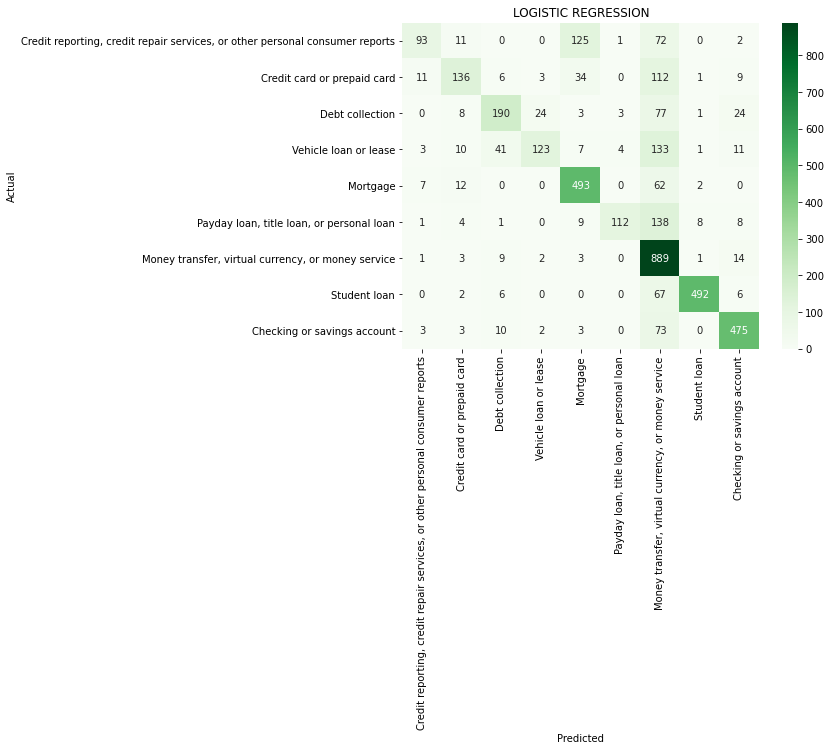

In [72]:
import seaborn as sns
confu_mat = confusion_matrix(y_test, predictions_logi)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LOGISTIC REGRESSION')
plt.show()

In [73]:
metrics.accuracy_score(y_test,predictions_logi)

0.715

In [74]:
metrics.precision_score(y_test,predictions_logi,average=None)

array([0.78151261, 0.71957672, 0.72243346, 0.7987013 , 0.7282127 ,
       0.93333333, 0.54775108, 0.97233202, 0.86520947])

In [75]:
metrics.recall_score(y_test,predictions_logi,average=None)

array([0.30592105, 0.43589744, 0.57575758, 0.36936937, 0.85590278,
       0.39857651, 0.96420824, 0.85863874, 0.83479789])

In [76]:
metrics.f1_score(y_test,predictions_logi,average=None)

array([0.43971631, 0.54291417, 0.64080944, 0.50513347, 0.78691141,
       0.55860349, 0.69862475, 0.91195551, 0.84973166])

In [77]:
#K NEAREST NEIGHBOURS
from sklearn.neighbors import KNeighborsClassifier

In [78]:
error_rate=[]
for i in range(1,36,2):
    text_knn=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(2,2))),('classifier',KNeighborsClassifier(n_neighbors=i))])
    text_knn.fit(X_train,y_train)
    pred_knn=text_knn.predict(X_test)
    error_rate.append(np.mean(pred_knn!=y_test))
    print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35


Text(0, 0.5, 'Error rate')

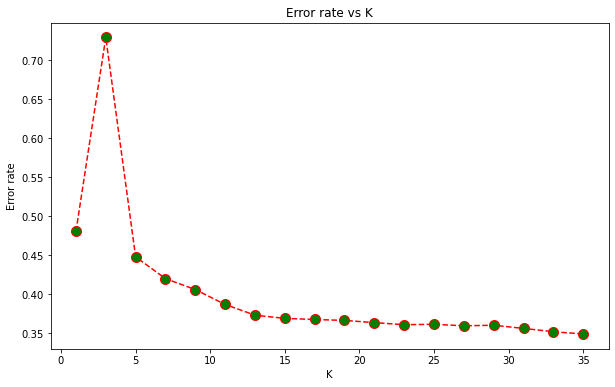

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,36,2),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

In [80]:
text_knn=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(2,2))),('classifier',KNeighborsClassifier(n_neighbors=11))])

In [81]:
text_knn.fit(X_train,y_train)
pred_knn=text_knn.predict(X_test)

In [82]:
metrics.accuracy_score(y_test,pred_knn)

0.6128571428571429

In [83]:
metrics.precision_score(y_test,pred_knn,average=None)

array([0.46333333, 0.55514706, 0.43367347, 0.43701799, 0.68411215,
       0.78604651, 0.69770254, 0.68208955, 0.71782178])

In [84]:
metrics.recall_score(y_test,pred_knn,average=None)

array([0.45723684, 0.48397436, 0.77272727, 0.51051051, 0.63541667,
       0.60142349, 0.62581345, 0.79755672, 0.50966608])

In [85]:
metrics.f1_score(y_test,pred_knn,average=None)

array([0.4602649 , 0.51712329, 0.55555556, 0.47091413, 0.65886589,
       0.68145161, 0.6598056 , 0.73531778, 0.59609455])

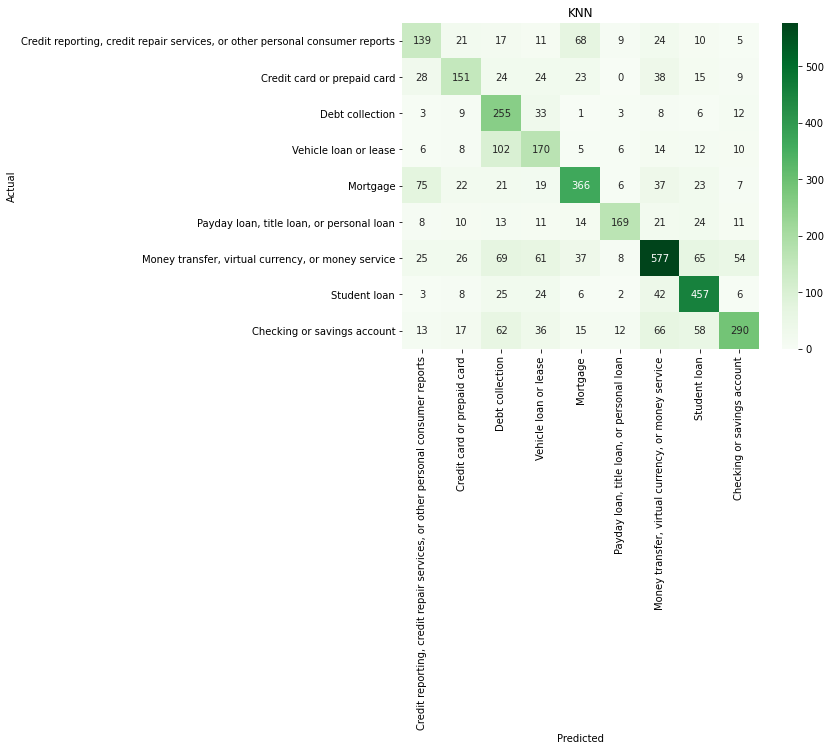

In [86]:
confu_mat = confusion_matrix(y_test, pred_knn)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN')
plt.show()

In [87]:
print(classification_report(y_test,pred_knn))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.46      0.46      0.46       304
                                                 Credit card or prepaid card       0.56      0.48      0.52       312
Credit reporting, credit repair services, or other personal consumer reports       0.43      0.77      0.56       330
                                                             Debt collection       0.44      0.51      0.47       333
                          Money transfer, virtual currency, or money service       0.68      0.64      0.66       576
                                                                    Mortgage       0.79      0.60      0.68       281
                                   Payday loan, title loan, or personal loan       0.70      0.63      0.66       922
                                                       

In [88]:
error_rate_1=[]
for i in range(50,100,5):
    text_knn_1=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(2,2))),('classifier',KNeighborsClassifier(n_neighbors=i))])
    text_knn_1.fit(X_train,y_train)
    pred_knn_1=text_knn_1.predict(X_test)
    error_rate_1.append(np.mean(pred_knn_1!=y_test))
    print(i)
    print(error_rate_1)

50
[0.34023809523809523]
55
[0.34023809523809523, 0.34214285714285714]
60
[0.34023809523809523, 0.34214285714285714, 0.33595238095238095]
65
[0.34023809523809523, 0.34214285714285714, 0.33595238095238095, 0.3392857142857143]
70
[0.34023809523809523, 0.34214285714285714, 0.33595238095238095, 0.3392857142857143, 0.3404761904761905]
75
[0.34023809523809523, 0.34214285714285714, 0.33595238095238095, 0.3392857142857143, 0.3404761904761905, 0.3438095238095238]
80
[0.34023809523809523, 0.34214285714285714, 0.33595238095238095, 0.3392857142857143, 0.3404761904761905, 0.3438095238095238, 0.3411904761904762]
85
[0.34023809523809523, 0.34214285714285714, 0.33595238095238095, 0.3392857142857143, 0.3404761904761905, 0.3438095238095238, 0.3411904761904762, 0.34095238095238095]
90
[0.34023809523809523, 0.34214285714285714, 0.33595238095238095, 0.3392857142857143, 0.3404761904761905, 0.3438095238095238, 0.3411904761904762, 0.34095238095238095, 0.33904761904761904]
95
[0.34023809523809523, 0.3421428571

In [89]:
error_rate_2=[]
for i in range(120,200,10):
    text_knn_2=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(2,2))),('classifier',KNeighborsClassifier(n_neighbors=i))])
    text_knn_2.fit(X_train,y_train)
    pred_knn_2=text_knn_2.predict(X_test)
    error_rate_2.append(np.mean(pred_knn_2!=y_test))
    print(i)
    print(error_rate_2)

120
[0.3426190476190476]
130
[0.3426190476190476, 0.34214285714285714]
140
[0.3426190476190476, 0.34214285714285714, 0.3383333333333333]
150
[0.3426190476190476, 0.34214285714285714, 0.3383333333333333, 0.3430952380952381]
160
[0.3426190476190476, 0.34214285714285714, 0.3383333333333333, 0.3430952380952381, 0.34904761904761905]
170
[0.3426190476190476, 0.34214285714285714, 0.3383333333333333, 0.3430952380952381, 0.34904761904761905, 0.35119047619047616]
180
[0.3426190476190476, 0.34214285714285714, 0.3383333333333333, 0.3430952380952381, 0.34904761904761905, 0.35119047619047616, 0.35119047619047616]
190
[0.3426190476190476, 0.34214285714285714, 0.3383333333333333, 0.3430952380952381, 0.34904761904761905, 0.35119047619047616, 0.35119047619047616, 0.3523809523809524]


Text(0, 0.5, 'Error rate')

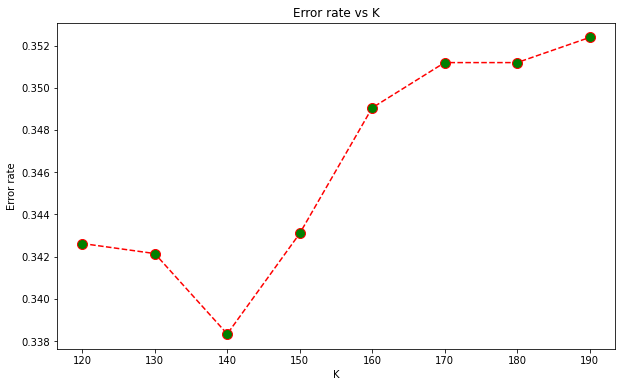

In [90]:
plt.figure(figsize=(10,6))
plt.plot(range(120,200,10),error_rate_2,color='red',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

In [91]:
print('Accuracy when K is 140 is',1-error_rate_2[2])

Accuracy when K is 140 is 0.6616666666666666
